# Do Pulsars Clear Their Lines of Sight of Electrons?

### DSCI 100-005 Group 19
### Brett King, Samantha Malinab, Yinuo Sun, Athena Wong

-----

## Introduction

When a massive star dies in a supernova explosion, it leaves its core behind as a super-compressed ball of neutrons called a neutron star. Neutron stars have an enormous magnetic field that produces polar jets of electromagnetic radiation. Neutron stars also spin very rapidly, so these jets trace out cone shapes as the star rotates. When Earth lies on one of these cones, we can observe the jet sweeping past Earth, and it appears as a pulsing star. Hence, these objects are called *pulsars*.

![](https://github.com/Kugelblitz64/dcsi100group19/blob/main/PulsarGif.gif?raw=true)

The Crab Nebula pulsar, seen near the centre. Gif from https://www.cloudynights.com/topic/285383-crab-nebulass-pulsar-is-blinking-not-a-joke/

Individually, a measurement of a pulsar's pulse is weak and difficult to distinguish from background noise. However, taking a measurement for each rotation of the pulsar within a timespan then averaging the measurements yields a much clearer graph of signal strength over time. This graph is called the pulsar's *integrated profile*, and its shape is stable and unique to each pulsar.

Additionally, each pulsar has a *dispersion measure*, or DM, which is a measurement of how dense free electrons are along the line of sight to the pulsar. The dispersion measure can be determined by how much the pulsar's signal is "spread out" before reaching Earth, and changes over time as it and Earth move through the galaxy. The signal-noise ratio, or SNR, of a pulse measurement is related to the pulsar's dispersion measure, and so each pulsar is assigned a signal-noise ratio versus dispersion measure (DM-SNR) graph.

With this knowledge, we will seek to answer this question: *Can pulsars' integrated profile mean, integrated profile excess kurtosis, and DM-SNR curve mean tell us whether pulsars clear their lines of sight of free electrons?*

To do this, we will use the HTRU2 dataset, which contains statistics regarding the two graphs discussed above for about 1600 true pulsars and 16000 false candidates.

To better understand the statistics contained in the dataset, we have created representations using Desmos. See the "Extras" section for more specific information regarding these.

<table><tr>
<td> <img src="https://github.com/Kugelblitz64/dcsi100group19/blob/main/IntegratedProfileExample.png?raw=true" style="width: 500px;"/> <figcaption>Fig. 1</figcaption> </td>
<td> <img src="https://github.com/Kugelblitz64/dcsi100group19/blob/main/DMSNRExample.png?raw=true" style="width: 500px;"/> <figcaption>Fig. 2</figcaption></td>
</tr></table>

-----

## Methods and Results

We first load in needed libraries and the dataset.

In [13]:
# Load in the necessary libraries.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

# Load in the HTRU2 dataset.
pulsar <- read_csv(url("https://raw.githubusercontent.com/Kugelblitz64/dcsi100group19/main/HTRU_2.csv"),
                   col_names = c("int_pro_mean", "int_pro_std", "int_pro_excess_kurtosis", "int_pro_skew",
                                 "dm_snr_mean", "dm_snr_std", "dm_snr_excess_kurtosis", "dm_snr_skew", "class")
                   ) |>
mutate(class = as_factor(class)) |>
arrange(class)

pulsar

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): int_pro_mean, int_pro_std, int_pro_excess_kurtosis, int_pro_skew, d...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


int_pro_mean,int_pro_std,int_pro_excess_kurtosis,int_pro_skew,dm_snr_mean,dm_snr_std,dm_snr_excess_kurtosis,dm_snr_skew,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.5625,55.68378,-0.2345714,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.5078,58.88243,0.4653182,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.0156,39.34165,0.3233284,1.0511644,3.121237,21.74467,7.735822,63.17191,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
77.07031,39.00064,1.884421,6.3721776,38.51756,65.74106,1.5895132,1.285346,1
28.37500,27.64931,6.377273,45.9440484,141.86037,82.89302,-0.4772223,-1.067880,1
111.76562,52.94359,0.671724,0.3835939,149.84365,97.92695,-0.6961534,-1.260403,1


-----

If pulsars clear their lines of sight of free electrons, what effects would this have on the data?

By definition, they would have a lower dispersion measure than false candidates. This means that:

- A pulsar's signal would be less spread out than false candidates', which would make a true pulsar's integrated profile "spikier." This would have two effects: For a true pulsar, less of the signal would be taken up by the pulse, so more time would be spent at ambient signal strength which would <u>lower the integrated profile mean.</u> Additionally, a spikier integrated profile would logically invoke a <u>higher excess kurtosis in the integrated profile.</u>

- The DM-SNR graph for true pulsars would be more condensed towards lower dispersion measure compared to false candidates. Lower dispersion measure correlates with higher signal-noise ratio, and as a result true pulsars would have a <u>higher DM-SNR curve mean.</u>

Therefore, if it is possible to accurately predict pulsars using K nearest neighbours classification based on a candidate's integrated profile mean, integrated profile excess kurtosis, and DM-SNR curve mean, we will have evidence that true pulsars do clear their lines of sight of free electrons. If classification does not produce accurate predictions, we will then have strong evidence that pulsars do not clear their lines of sight.

-----

To begin, we will first trim down the dataset to only include the variables we are using.

In [14]:
# Trim the dataset down to only have the columns for integrated profile mean,
# integrated profile excess kurtosis, DM-SNR mean, and class.
selected_pulsar<-select(pulsar, int_pro_mean, int_pro_excess_kurtosis,
dm_snr_mean, class)

selected_pulsar

int_pro_mean,int_pro_excess_kurtosis,dm_snr_mean,class
<dbl>,<dbl>,<dbl>,<fct>
140.5625,-0.2345714,3.199833,0
102.5078,0.4653182,1.677258,0
103.0156,0.3233284,3.121237,0
⋮,⋮,⋮,⋮
77.07031,1.884421,38.51756,1
28.37500,6.377273,141.86037,1
111.76562,0.671724,149.84365,1


Next, we must use Tidymodels to train a prediction model to predict a candidate's class based on the other three variables. We will split the dataset into training and testing data, and perform cross-validation on the training set to choose the number of neighbours that produces the most accurate predictions.

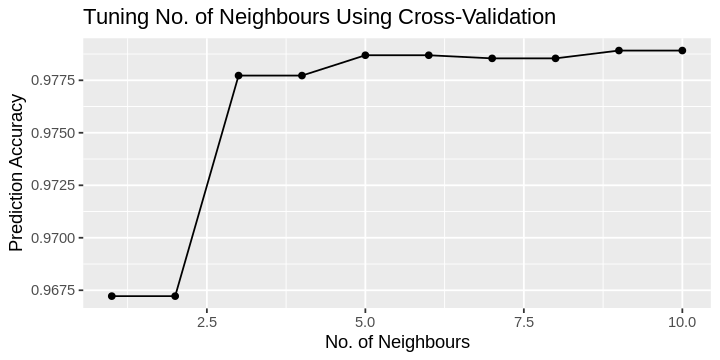

In [43]:
# Set a seed so our process is reproducible.
set.seed(00519)

# Split the dataset into a training and testing set.
pulsar_split <- initial_split(selected_pulsar, prop = 0.75, strata = class)
pulsar_train <- training(pulsar_split)
pulsar_test <- testing(pulsar_split)

# Make a recipe with the training data that scales and centers the predictor variables.
pulsar_recipe <- recipe(class ~ ., data = pulsar_train) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

# Fold the training data.
pulsar_vfold <- vfold_cv(pulsar_train, v = 5, strata = class)

# Make a classification model that tunes the number of neighbours, and find the best k using a workflow with the folded data.
pulsar_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")
k_vals <- tibble(neighbors = seq(1,10))
knn_results <- workflow() |>
add_recipe(pulsar_recipe) |>
add_model(pulsar_spec) |>
tune_grid(resamples = pulsar_vfold, grid = k_vals) |>
collect_metrics()

options(repr.plot.width = 6, repr.plot.height = 3)
ggplot(knn_results |> filter(.metric == "accuracy"),
       aes(x = neighbors, y = mean)) +
geom_point() + geom_line() +
labs(x = "No. of Neighbours", y = "Prediction Accuracy", title = "Tuning No. of Neighbours Using Cross-Validation")

Looking at the graph above, we see that after a jump, the model's prediction plateaus around k = 5 neighbours. So, we will use 5 neighbours to predict the testing data.

In [44]:
# Make a model with the best k and use it on the testing data.
pulsar_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
set_engine("kknn") |>
set_mode("classification")

pulsar_fit <- workflow() |>
add_recipe(pulsar_recipe) |>
add_model(pulsar_model) |>
fit(pulsar_train)

# Create a dataframe that compares candidates' true classes to their predicted classes.
pred_results <- bind_cols(pulsar_test |> select(class),
    predict(pulsar_fit, pulsar_test))

pred_results

class,.pred_class
<fct>,<fct>
0,0
0,0
0,0
⋮,⋮
1,1
1,0
1,1


To see if our model accurately predicted pulsar candidates it has not seen before, we will find a numerical value for its accuracy, and visualize it using bar graphs showing how its predictions compare to reality.

[1] "Confusion Matrix:"


          Truth
Prediction    0    1
         0 4050   59
         1   34  332

.metric,.estimate
<chr>,<dbl>
accuracy,0.9792179
precision,0.9071038
recall,0.8491049


`summarise()` has grouped output by 'class'. You can override using the
`.groups` argument.


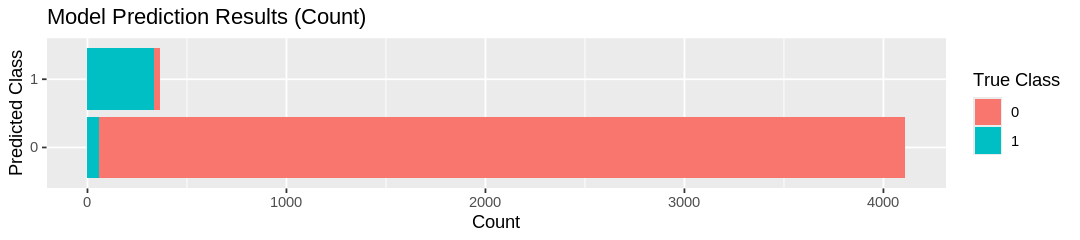

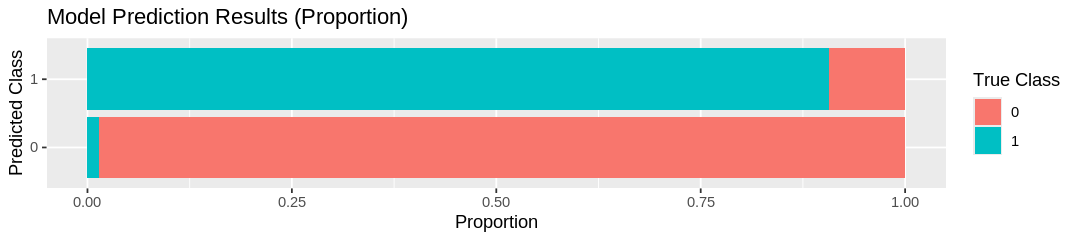

In [75]:
# Show statistics regarding the model's accuracy.
print("Confusion Matrix:")
pulsar_cm <- conf_mat(pred_results, truth = class, estimate = .pred_class)
pulsar_cm

# event_level = "second" must be used for this function to treat a class label of 1 as "positive."
summary(pulsar_cm, event_level = "second") |>
select(-".estimator") |>
slice(1, 11, 12)

# Create bar graphs split between predicted class, with each bar showing true classes within.
pred_counts <- pred_results |> group_by(class, .pred_class) |> summarize(count = n())

options(repr.plot.width = 9, repr.plot.height = 2)
ggplot(pred_counts, aes(x = .pred_class, y = count, fill = class)) +
geom_bar(stat = "identity") +
coord_flip() +
labs(x = "Predicted Class", y = "Count", fill = "True Class", title = "Model Prediction Results (Count)")

ggplot(pred_counts, aes(x = .pred_class, y = count, fill = class)) +
geom_bar(stat = "identity", position = "fill") +
coord_flip() +
labs(x = "Predicted Class", y = "Proportion", fill = "True Class", title = "Model Prediction Results (Proportion)")

## Discussion

Write the conclusion from what we found.

## Extras

Here are the visualizations we created to help understand the data we used.

<table><tr>
<td> <img src="https://github.com/Kugelblitz64/dcsi100group19/blob/main/IntegratedProfileExample.png?raw=true" style="width: 500px;"/> <figcaption>Fig. 3</figcaption></td>
<td> <img src="https://github.com/Kugelblitz64/dcsi100group19/blob/main/DMSNRExample.png?raw=true" style="width: 500px;"/> <figcaption>Fig. 4</figcaption></td>
</tr></table>

The means of each graph are marked in red. The mean is the average y value of the graph.

The standard deviations are represented by the blue lines. It gives an idea of the "width" of where most values lie in the graph.

The excess kurtosis is essentially a measurement of how much the graph jumps away from the mean.

The skew is in essence a comparison between how much of the graph lies above the mean compared to below it. Positive skew indicates more of the graph lies above, negative skew indicates more of the graph lies below.

## References

Grootjans, Roelof. Detection of Dispersed Pulsars in a Time Series by Using a Matched Filtering Approach, University of Twente, Aug. 2016, https://essay.utwente.nl/71435/1/GROOTJANS_MA_EWI.pdf. Accessed Apr. 2024. 

Liu, Kuo. “Introduction to Pulsar, Pulsar Timing, and Measuring of Pulse Time-of-Arrivals.” France, Sèvres, 26 June 2017. 

Lyon, Robert J., et al. “From Simple Filters to a New Principled Real-Time Classification Approach, Monthly Notices of the Royal Astronomical Society.” UC Irvine Machine Learning , 13 Feb. 2017, Accessed Apr. 2024. 

ResearchGate, 2019, www.researchgate.net/figure/An-example-Pulsar-0003-from-HTRU-1-dataset-These-four-subplots-are-folded-profile_fig1_335483097. 

Sejnowski,Terry and Gorman,R.. Connectionist Bench (Sonar, Mines vs. Rocks). UCI Machine Learning Repository. https://doi.org/10.24432/C5T01Q.